# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

How to compare different designation salaries in different companies

In [1]:
#import your libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


#your info here
__author__ = "Shiva Kumar"
__email__ = "ams.sks@outlook.com"

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


# Part 2 - DISCOVER

# ---- 2 Load the data ----

In [2]:
# load the data into a Pandas dataframe
train_features_df = pd.read_csv('train_features.csv')
train_target_df = pd.read_csv('train_salaries.csv')
test_features_df = pd.read_csv('test_features.csv')

# Examine the data

In [3]:
train_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68


In [4]:
test_features_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [5]:
train_target_df.head(10)

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163
5,JOB1362684407692,113
6,JOB1362684407693,178
7,JOB1362684407694,73
8,JOB1362684407695,31
9,JOB1362684407696,104


# Use .info() to see length and dtypes

In [6]:
train_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [7]:
train_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [63]:
test_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


# Check for duplicates

In [8]:
train_features_df.duplicated().sum()

0

In [9]:
train_target_df.duplicated().sum()

0

In [10]:
test_features_df.duplicated().sum()

0

# Identify numerical and categorical variables

In [11]:
train_features_df.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [67]:
numeric_cols = ['yearsExperience','milesFromMetropolis']

In [12]:
categorical_cols =['jobId', 'companyId', 'jobType', 'degree', 'major','industry']

# Summarize numerical and  categorical variables separately

In [13]:
train_features_df.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [14]:
train_features_df.describe()

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


# Merge features and targets into single df

In [15]:
#Merge the features and salaries on jobId,delete original file to save memory
train_df = pd.merge(train_features_df, train_target_df, on='jobId')

In [71]:
#del train_feature_df
#del train_target_df

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


# Visualize target variable salary

<Figure size 1008x432 with 0 Axes>

ValueError: num must be 1 <= num <= 2, not 3

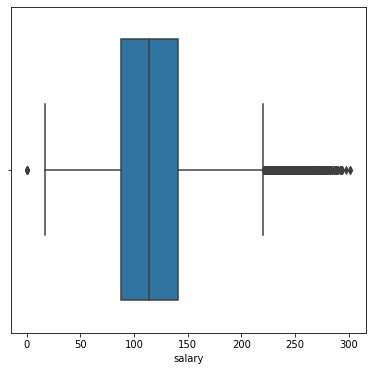

In [17]:
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,3)
sns.distplot(train_df.salary, bins=20)
plt.show()

### ---- 4 Explore the data (EDA) ----

In [ ]:
Use IQR rule to identify

In [ ]:
#summarize each feature variable
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

In [73]:
train_df.describe() # summarize each continuous variable

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


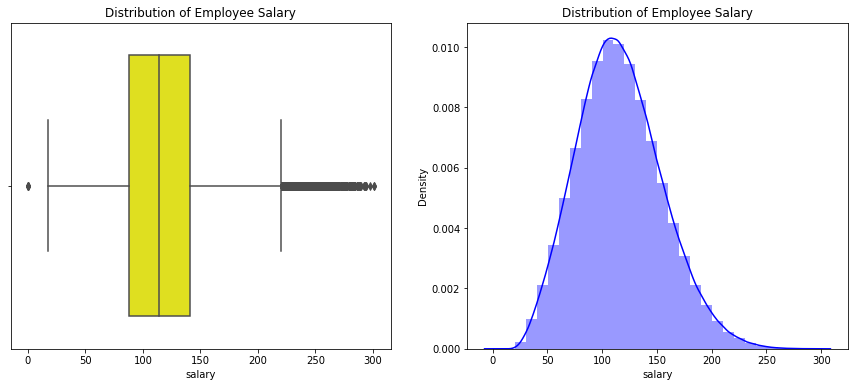

In [32]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary, color='yellow')
plt.title('Distribution of Employee Salary')
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins = 30, color='blue')
plt.title('Distribution of Employee Salary')
plt.savefig("salary_distribution.png")
plt.show();

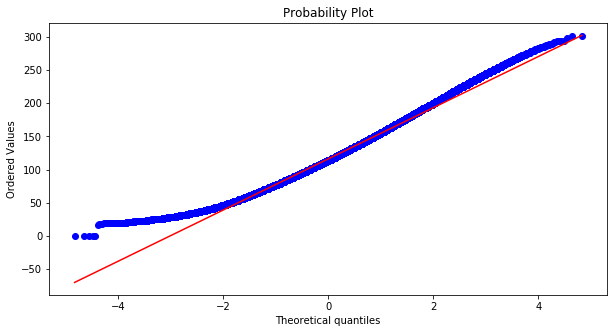

In [33]:
plt.figure(figsize = (10,5))
sp.stats.probplot(train_df.salary, dist='norm', plot=plt) # check for normality
plt.savefig("salary_quantile_quantile_plot.png")
plt.show();

# Feature Variable


In [34]:

train_df.describe(include=['O']) # summarize each categorical variable

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362684884600,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


In [35]:
def plot_feature(df, col):
    """ Make plot for the feature <col> from the data frame <df>.
    """
    plt.figure(figsize = (14, 6))
    if df[col].dtype != 'int64':
        plt.subplot(1, 2, 1)
        # change the categorial variable to category type and order their level by the mean salary in each category
        mean = df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels, inplace=True)
        mean.sort_values().plot(kind='bar')
        
    if col not in ['companyId', 'yearsExperience', 'milesFromMetropolis']:
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('Average Salary by' + ' ' + col.capitalize())
        plt.subplot(1, 2, 2)
    
    if df[col].dtype == 'int64':
        # plot the mean salary for each category and fill between (mean - std, mean + std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)), mean.values - std.values, mean.values + std.values, alpha = 0.1)
        plt.savefig("images/salary_vs_" + col + ".png")
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
        plt.xticks(rotation=45)
        plt.ylabel('Salaries')
        plt.savefig("salary_by_" + col + ".png")
        plt.show()

# Correlation Between Each Feature and the Target

In [ ]:

cat_variables = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry'] 
num_variables = ['yearsExperience', 'milesFromMetropolis', 'salary']
feat_variables = ['jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis'] 
# jobId and companyId aren't included because they are either distinct or contribute negligible information

In [ ]:
for feature in feat_variables:
    plot_feature(train_df, feature)

A positive correlation can be seen between average salary and the level of job type and of degree; types like those on C-level have high salary average; a higher degree tends to have high average salary. More technical majors like computer science and engineering also tend to have high average salary. Industries like finance and oil also tend to have higher average salary.

Salary has a positive relationship with years of experience and a negative relationship with the distance from metropolis.

In [40]:
def encode_label(df, col):
    """ Encode the categories using average salary for each category to replace label.
    """
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train_df[train_df[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [41]:
train_df_copy = train_df.copy()
for col in train_df_copy.columns:
    if train_df_copy[col].dtype.name == 'category':
        encode_label(train_df_copy, col)
        train_df_copy[col] = train_df_copy[col].astype('float')

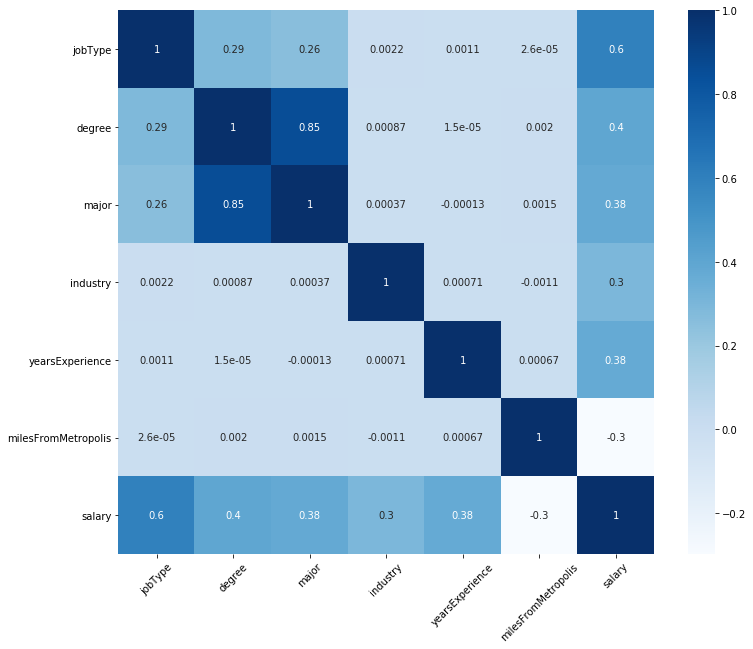

In [42]:
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(train_df_copy[features + ['salary']].corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.savefig("correlation_matrix_heatmap.png")
plt.show();

Degree, major, and job type have relatively high correlations with each other. This is expected since one's job is directly reltaed to his/her expertise. JobId is removed since it is distinct for each worker.

### ---- 5 Establish a baseline ----

In [24]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

#the column of industry is already encoded as the average salary 



In [43]:
mse_base = mean_squared_error(train_df_copy['industry'], train_df_copy['salary'])

In [44]:
mse_base

1367.1891080861149


The mean squared error of the baseline model is about 1367.12. Let's see how we can do better

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

In [45]:
# Model 1: Linear Regression
from sklearn.linear_model import LinearRegression # most straight forward and fast to compute
# Model 2: Random Forest
from sklearn.ensemble import RandomForestRegressor # more accurate especially with a large amount of data
# Model 3: Gradient Boosting 
from sklearn.ensemble import GradientBoostingRegressor # reduce overfitting

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

In [46]:
cat_variables.remove('jobId')
cat_variables.remove('companyId')

In [47]:
dummy_features_train = pd.get_dummies(train_df[cat_variables], drop_first=True)
train_df_reg = pd.concat([dummy_features_train, train_df[num_variables]], axis=1)
train_df_reg.head(5)

,jobType_JUNIOR,jobType_SENIOR,jobType_MANAGER,jobType_VICE_PRESIDENT,jobType_CFO,jobType_CTO,jobType_CEO,degree_HIGH_SCHOOL,degree_BACHELORS,degree_MASTERS,...,major_ENGINEERING,industry_SERVICE,industry_AUTO,industry_HEALTH,industry_WEB,industry_FINANCE,industry_OIL,yearsExperience,milesFromMetropolis,salary
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,10,83,130
1,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,3,73,101
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,10,38,137
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,8,17,142
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,8,16,163


In [48]:
# split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(train_df_reg.iloc[:,:-1], train_df_reg.salary, test_size=0.2)

In [49]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(800000, 27)

(200000, 27)

(800000,)

(200000,)

### ---- 8 Create models ----

### 8.1 Linear Regression

In [50]:
#create and tune the models that you brainstormed during part 2
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lin_reg.score(X_train, y_train)

0.7438265137353192

In [52]:
lr_predict = lin_reg.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predict) # calculate the mean square error of the linear model
lr_mse

384.99439596765086

#### 8.2 Random Forest

In [53]:
rf_reg = RandomForestRegressor(n_estimators=170, n_jobs=2, max_depth=30, min_samples_split=60, max_features='auto', verbose=0)

In [54]:
# calculate the mean square error of the random forest model
rf_nmse = cross_val_score(rf_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error") 
rf_mse = -1.0 * np.mean(rf_nmse)

In [55]:
rf_mse

389.8027943629138

##### 8.3 Gradient Boosting

In [ ]:
gb_reg = GradientBoostingRegressor(n_estimators=160, max_depth=6, loss='ls',verbose=0)

In [ ]:
# calculate the mean square error of the gradient boosting model
gb_nmse = cross_val_score(gb_reg, X_test, y_test, cv=5, scoring="neg_mean_squared_error")
gb_mse = -1.0 * np.mean(gb_nmse)

In [ ]:
gb_mse

### ---- 9 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model
#do 5-fold cross validation on models and measure MSE
models_mse = {'models': ['Linear Regression', 'Random Forest', 'Gradient Boosting'], 'mean_squared_error': [lr_mse, rf_mse, gb_mse]}
model = pd.DataFrame(models_mse)

In [ ]:
model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----


Prepare the test dataset for fitting model

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset
num_variables.remove('salary')

In [ ]:
dummy_features_test = pd.get_dummies(test_features_df[cat_variables], drop_first=True)
test_df_reg = pd.concat([dummy_features_test, test_features_df[num_variables]], axis=1)

In [ ]:

test_df_reg.head(5)

In [ ]:
# write script that trains model on entire training set, saves model to disk

In [ ]:
gb_reg.fit(train_df_reg.iloc[:,:-1], train_df_reg.salary)

In [ ]:
test_prediction = gb_reg.predict(test_df_reg) # predict 
prediction = pd.DataFrame(test_prediction).rename(columns={0:'predicted_salary'})

In [ ]:

# and scores the "test" dataset
prediction_final = pd.concat([test_features_df['jobId'], prediction], axis=1)
prediction_final.head(5)

### ---- 12 Deploy solution ----

In [16]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

In [ ]:

prediction_final.to_csv("data/predicted_salaries.csv")

In [ ]:
feature_importance = pd.DataFrame({'features': test_df_reg.columns, 'importance': gb_reg.feature_importances_})

In [ ]:
feature_importance.sort_values(by='importance', ascending=True, inplace=True) # sort features by ascending importance

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x='importance', y='features', data=feature_importance)
plt.savefig("images/feature_importances.png")
plt.show();

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data

In [ ]:
test_prediction = gb_reg.predict(test_df_reg) # predict 
prediction = pd.DataFrame(test_prediction).rename(columns={0:'predicted_salary'}